# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background


At this data analytics capstone project I try to scrap US Dollar exchange rate data to rupiah from https://www.exchange-rates.org/history/IDR/USD/T. I will try to scrap this sites for educational purpose only to get the final value of the data analytic course.

The data available on the website is a time series data consisting of 2 columns, namely Date and USD to IDR. As for the time span, that is for approximately 6 months, starting from 12-October-2022 to 7-April-2023. However, on the website there are several missed dates due to holidays/weekends so there is no activity. Therefore, it is necessary to apply Exploratiry Data Analysis to help fill in values from date data that are empty/missing value in the data.

After the EDA process was carried out to get insight from the data on the movement of the dollar to rupiah exchange rate, a plot was made for visualizing the data to make it easier to take insights.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [54]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [55]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [56]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [57]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-04-11">
    April 11, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-04-11">
    2023-4-11
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     14,915
    </span>
   </span>
   <span class="n">
    <span class="nowra


### Define Column/Variable

**1. Date**

In [58]:
table.find_all('a', attrs={'class':'w'})[:5]

[<a class="w" href="/exchange-rate-history/usd-idr-2023-04-11">April 11, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-10">April 10, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-07">April 7, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-06">April 6, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-05">April 5, 2023</a>]

In [59]:
table.find_all('a', attrs={'class':'w'})[0].text

'April 11, 2023'

**2. Price**

In [60]:
table.find_all('span', attrs={'class':'w'})[:5]

[<span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,915</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,950</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,941</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,931</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,960</span></span>]

In [61]:
table.find_all('span', attrs={'class':'w'})[0].text

'$1 = Rp14,915'

### Finding row length

In [62]:
row = table.find_all('a', attrs={'class':'w'})
row_length = len(row)
row_length

129

#### Do the scrapping process here (please change this markdown with your explanation)

In [63]:
temp = [] #initiating a tuple


for i in range(1, row_length):

    #scrapping process
    #get date 
    date = table.find_all('a', attrs={'class':'w'})[i].text
    
    #get price
    price = table.find_all('span', attrs={'class':'w'})[i].text
    price = price.strip().replace('$1 = Rp','')#to remove excess white space and symbols, sehingga menjadi angka
    
    
    temp.append((date,price)) 
    
temp 

[('April 10, 2023', '14,950'),
 ('April 7, 2023', '14,941'),
 ('April 6, 2023', '14,931'),
 ('April 5, 2023', '14,960'),
 ('April 4, 2023', '14,957'),
 ('April 3, 2023', '14,922'),
 ('March 31, 2023', '14,969'),
 ('March 30, 2023', '15,024'),
 ('March 29, 2023', '15,034'),
 ('March 28, 2023', '15,060'),
 ('March 27, 2023', '15,107'),
 ('March 24, 2023', '15,165'),
 ('March 23, 2023', '15,085'),
 ('March 22, 2023', '15,253'),
 ('March 21, 2023', '15,301'),
 ('March 20, 2023', '15,343'),
 ('March 17, 2023', '15,375'),
 ('March 16, 2023', '15,429'),
 ('March 15, 2023', '15,459'),
 ('March 14, 2023', '15,380'),
 ('March 13, 2023', '15,416'),
 ('March 10, 2023', '15,503'),
 ('March 9, 2023', '15,495'),
 ('March 8, 2023', '15,449'),
 ('March 7, 2023', '15,429'),
 ('March 6, 2023', '15,354'),
 ('March 3, 2023', '15,278'),
 ('March 2, 2023', '15,322'),
 ('March 1, 2023', '15,249'),
 ('February 28, 2023', '15,241'),
 ('February 27, 2023', '15,216'),
 ('February 24, 2023', '15,265'),
 ('February

## Creating data frame & Data wrangling

Put the array into dataframe

In [64]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','Dolar to Rupiah'))
df.set_index('Date')

,Dolar to Rupiah
Date,
"April 10, 2023","14,950"
"April 7, 2023","14,941"
"April 6, 2023","14,931"
"April 5, 2023","14,960"
"April 4, 2023","14,957"
...,...
"October 19, 2022","15,587"
"October 18, 2022","15,474"
"October 17, 2022","15,441"


In [65]:
#Check Type Data
df.dtypes

Date               object
Dolar to Rupiah    object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [66]:
# Change Type Data

df['Date'] = df['Date'].astype('datetime64')
df['Dolar to Rupiah'] = df['Dolar to Rupiah'].str.replace(',','.')
df['Dolar to Rupiah'] = df['Dolar to Rupiah'].astype('float64')

df

,Date,Dolar to Rupiah
0,2023-04-10,14.950
1,2023-04-07,14.941
2,2023-04-06,14.931
3,2023-04-05,14.960
4,2023-04-04,14.957
...,...,...
123,2022-10-19,15.587
124,2022-10-18,15.474
125,2022-10-17,15.441
126,2022-10-14,15.472


In [67]:
df.dtypes

Date               datetime64[ns]
Dolar to Rupiah           float64
dtype: object

In [68]:
df

,Date,Dolar to Rupiah
0,2023-04-10,14.950
1,2023-04-07,14.941
2,2023-04-06,14.931
3,2023-04-05,14.960
4,2023-04-04,14.957
...,...,...
123,2022-10-19,15.587
124,2022-10-18,15.474
125,2022-10-17,15.441
126,2022-10-14,15.472


Set index for the new variable

In [70]:
exchange_rate = df.set_index('Date')
exchange_rate

,Dolar to Rupiah
Date,
2023-04-10,14.950
2023-04-07,14.941
2023-04-06,14.931
2023-04-05,14.960
2023-04-04,14.957
...,...
2022-10-19,15.587
2022-10-18,15.474
2022-10-17,15.441


Because the data is time series, date by date must exist and have the value, so data must be completed first

In [71]:
# re-indexing according to 'Da' on the website, from 12-October-2022 to 7-April-2023

periode = pd.date_range(start= '2022-10-12', end = '2023-04-07')
exchange_rate = exchange_rate.reindex(periode)
exchange_rate

,Dolar to Rupiah
2022-10-12,NaN
2022-10-13,15.372
2022-10-14,15.472
2022-10-15,NaN
2022-10-16,NaN
...,...
2023-04-03,14.922
2023-04-04,14.957
2023-04-05,14.960
2023-04-06,14.931


In [72]:
# missing value check
exchange_rate.isna().sum()

Dolar to Rupiah    51
dtype: int64

There are 50 days whose value is not available so it is filled in using the ffill and bffill methods

In [73]:
exchange_rate = exchange_rate.ffill().bfill()
exchange_rate

,Dolar to Rupiah
2022-10-12,15.372
2022-10-13,15.372
2022-10-14,15.472
2022-10-15,15.472
2022-10-16,15.472
...,...
2023-04-03,14.922
2023-04-04,14.957
2023-04-05,14.960
2023-04-06,14.931


In [74]:
# after filling in the value so that there are no empty days
exchange_rate.isna().sum()

Dolar to Rupiah    0
dtype: int64

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

Because in this case the data is in the form of a time series taken for 6 months, starting from 12-October-2022 to 7-April-2023 but some of the dates have values that are not available so EDA is carried out using the `ffill()`and `bfill()` method to complete the values on empty dates (weekends) so that there are no *missing values* anymore, but before that adjust the data type fisrts so that it can be processed further. In addition, Wrangling Data is done by changing the Date column to index. After the data is ready, visualization of the data is carried out to see the historical value of the US Dollar to IDR Rupiah exchange rate using a line plot.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Exchange Rate Historical 12-October-2022 to 7-April-2023'}>

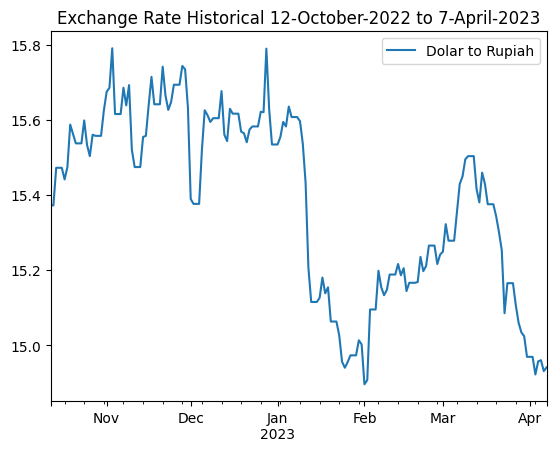

In [75]:
exchange_rate.plot(kind = 'line', title ='Exchange Rate Historical 12-October-2022 to 7-April-2023')

From the plot visualization above it can be concluded that:
- Initially when in 2022 the exchange rate has a very high value, but in 2023 the exchange rate has decreased.
- Drastic decline occurred in January 2023.
- From February 2023 to March 2023 the exchange rate fluctuated untill from March to April it almost decreased.
- the 2022 exchange rate is greater than the 2023 exchange rate.
- the lowest exchange rates value in February 2023.
- the highest exchange rates in November and December 2022.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.